In [1]:
# Goal write a series of simple MD simulations, calculate some thermodyamic averages, 
# explore numerical stability versus timestep size.

Let us try a simple case of a harmonic oscillator.
$$
U(r) = k(r-r_0)^2
$$

$$
F = -\frac{dU}{dr} = -2k(r-r_0)
$$

$$
a(r) = \frac{F}{m}
$$

And our equations of motion are:

$$
a = \frac{\mathrm{d}v}{\mathrm{d}t}
$$
$$
v = \frac{\mathrm{d}r}{\mathrm{d}t}
$$

Which can be written in integrated form as
$$
v(t+\delta t) = v(t) + a(t)\delta t
$$
$$
r(t + \delta t) = r(t) + v(t)\delta(t) + \frac{1}{2}a(t)\delta t^2
$$

In [2]:
# write a function for the potential energy U(r)

In [3]:
def U_harmonic(r, req, k):
    """Compute the potential energy at point r for a harmonic oscillator
    Args:
        r (float): The bond length.
        req (float): The equilibrium bond length.
        k (float): The bond force constant.
        
    Returns:
        float
        
    """
    return k*(r-req)**2

In [4]:
k = 575.0
r0 = 0.74

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [6]:
# create a numpy array containing a series of r values to use for plotting
r = np.linspace(0.38, 1.1)

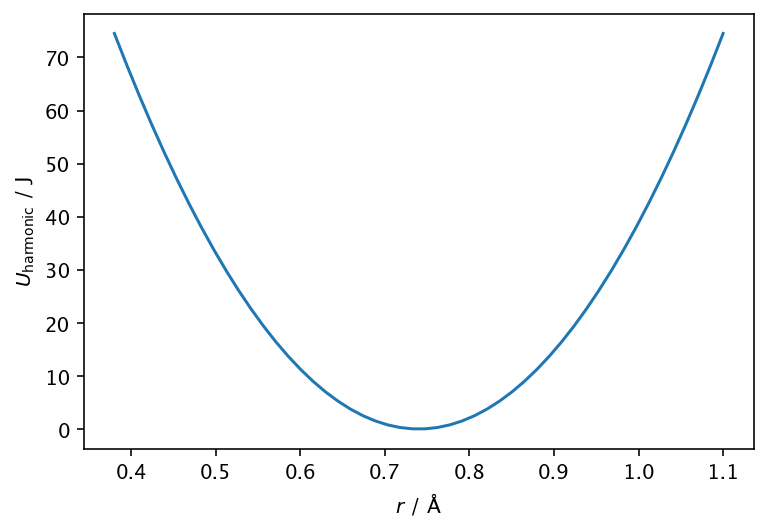

In [7]:
plt.plot(r, U_harmonic(r, r0, k))
plt.xlabel('$r$ / Å')
plt.ylabel('$U_\mathrm{harmonic}$ / J')
plt.show()

In [8]:
# Start at r(t=0) = 1.0 Å

In [9]:
r_t = 1.0
v_t = 0.0

In [10]:
def F_harmonic(r, req, k):
    """Compute the force at position r for a harmonic oscillator
    Args:
        r (float): The bond length.
        req (float): The equilibrium bond length.
        k (float): The bond force constant.
        
    Returns:
        float
        
    """
    return -2*k*(r-req)

In [11]:
force = F_harmonic(r_t, r0, k)
force

-299.0

In [12]:
timestep = 0.001

In [13]:
mass = 1.0

In [14]:
a = force/mass
a

-299.0

In [56]:
r_t = 1.0
v_t = 0.0
dt = 0.00001
r_stored = []
v_stored = []
for i in range(50000):
    r_stored.append(r_t)
    v_stored.append(v_t)
    f_t = F_harmonic(r_t, r0, k)
    a_t = f_t / mass
    v_t2 = v_t + a_t * dt
    r_t2 = r_t + v_t * dt + 0.5 * a_t * dt**2
    r_t = r_t2
    v_t = v_t2

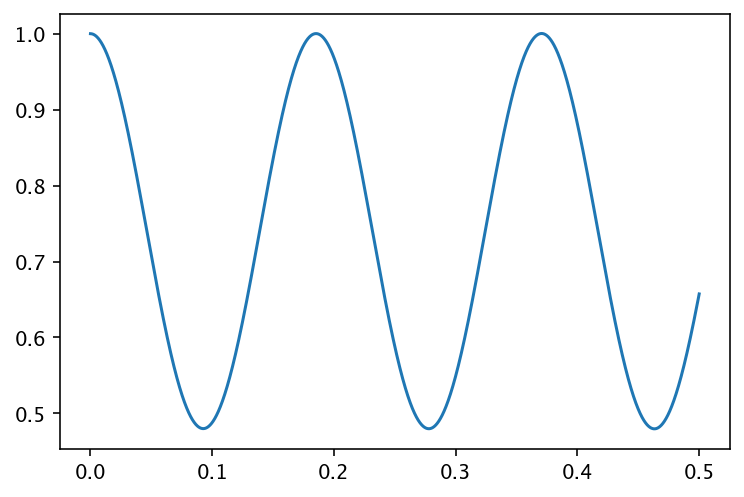

In [57]:
time = np.arange(len(r_stored)) * dt
plt.plot(time, r_stored)
plt.show()

In [58]:
# K.E. during the simulation / P.E. during the simulation

In [59]:
kinetic_energy = 0.5 * mass * np.array(v_stored)**2
potential_energy = U_harmonic(np.array(r_stored), r0, k)

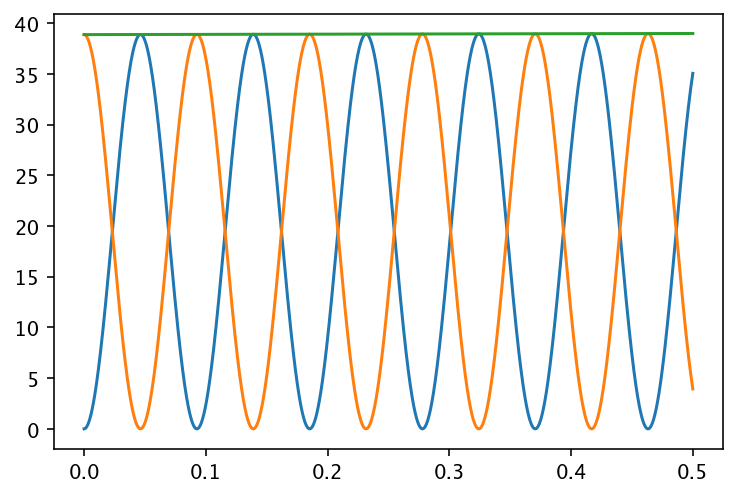

In [60]:
plt.plot(time, kinetic_energy)
plt.plot(time, potential_energy)
plt.plot(time, kinetic_energy+potential_energy)

In [61]:
# run a longer simulation?

In [62]:
r_t = 1.0
v_t = 0.0
dt = 1e-5
r_stored = []
v_stored = []
for i in range(500000):
    r_stored.append(r_t)
    v_stored.append(v_t)
    f_t = F_harmonic(r_t, r0, k)
    a_t = f_t / mass
    v_t2 = v_t + a_t * dt
    r_t2 = r_t + v_t * dt + 0.5 * a_t * dt**2
    r_t = r_t2
    v_t = v_t2

In [63]:
time = np.arange(len(r_stored)) * dt
kinetic_energy = 0.5 * mass * np.array(v_stored)**2
potential_energy = U_harmonic(np.array(r_stored), r0, k)

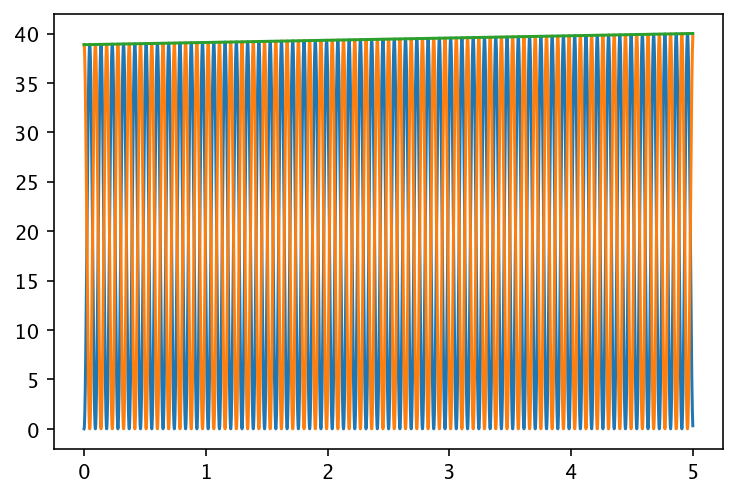

In [64]:
plt.plot(time, kinetic_energy)
plt.plot(time, potential_energy)
plt.plot(time, kinetic_energy+potential_energy)

In [26]:
# Try larger timestep

r_t = 1.0
v_t = 0.0
dt = 0.0001
r_stored = []
v_stored = []
for i in range(500000):
    r_stored.append(r_t)
    v_stored.append(v_t)
    f_t = F_harmonic(r_t, r0, k)
    a_t = f_t / mass
    v_t2 = v_t + a_t * dt
    r_t2 = r_t + v_t * dt + 0.5 * a_t * dt**2
    r_t = r_t2
    v_t = v_t2

In [27]:
time = np.arange(len(r_stored)) * dt
kinetic_energy = 0.5 * mass * np.array(v_stored)**2
potential_energy = U_harmonic(np.array(r_stored), r0, k)

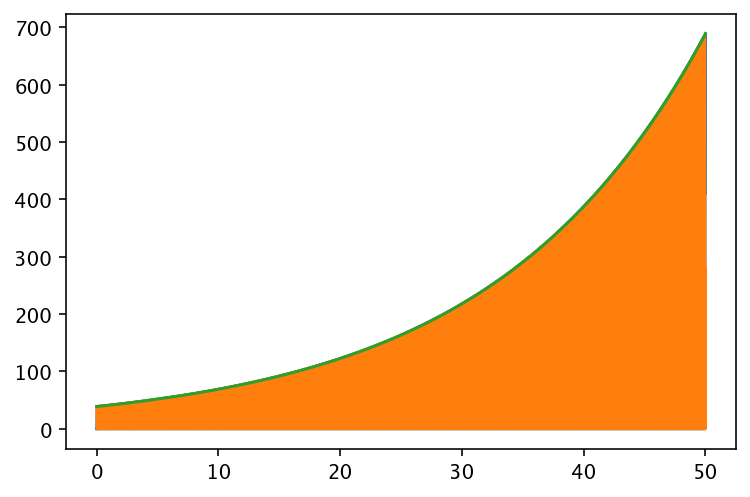

In [28]:
plt.plot(time, kinetic_energy)
plt.plot(time, potential_energy)
plt.plot(time, kinetic_energy+potential_energy)

In [29]:
# NOT CONSERVING ENERGY!!

In [30]:
# Can we try Velocity Verlet?

In [32]:
r_t = 1.0
v_t = 0.0
dt = 0.00001
r_stored = []
v_stored = []
for i in range(500000):
    r_stored.append(r_t)
    v_stored.append(v_t)
    f_t = F_harmonic(r_t, r0, k)
    a_t = f_t / mass
    r_t2 = r_t + v_t * dt + 0.5 * a_t * dt**2
    f_t2 = F_harmonic(r_t2, r0, k)
    a_t2 = f_t2 / mass
    v_t2 = v_t + 0.5*(a_t + a_t2)*dt
    r_t = r_t2
    v_t = v_t2

In [33]:
time = np.arange(len(r_stored)) * dt
kinetic_energy = 0.5 * mass * np.array(v_stored)**2
potential_energy = U_harmonic(np.array(r_stored), r0, k)

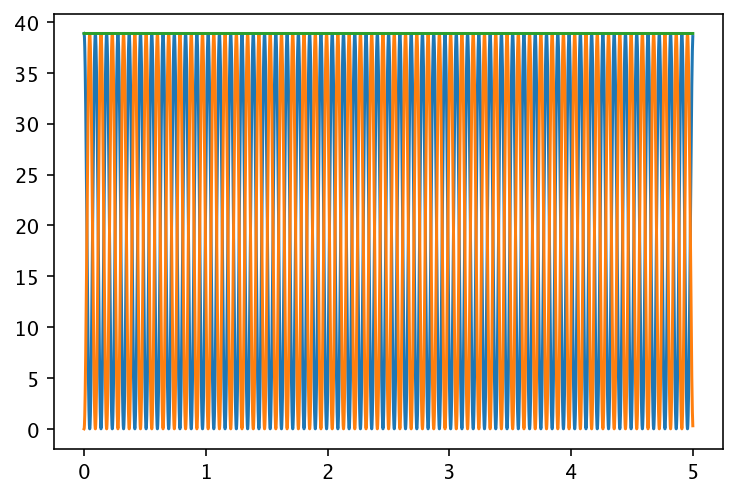

In [35]:
plt.plot(time, potential_energy)
plt.plot(time, kinetic_energy)
plt.plot(time, kinetic_energy+potential_energy)
plt.show()

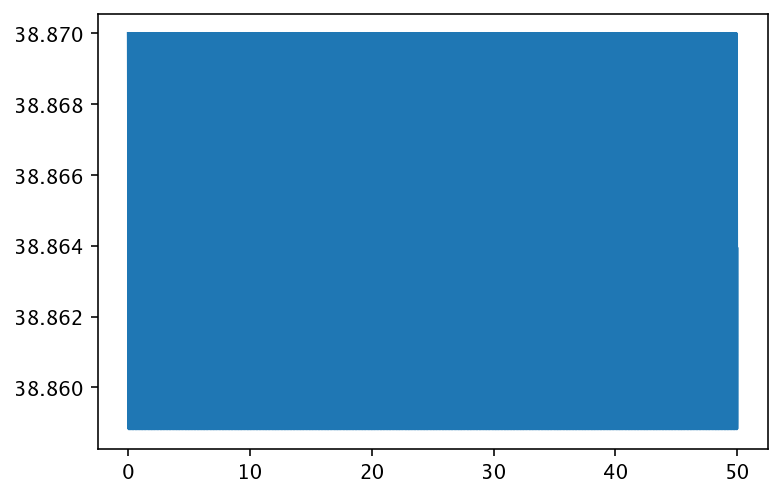

In [49]:
r_t = 1.0
v_t = 0.0
dt = 0.001
r_stored = []
v_stored = []
for i in range(50000):
    r_stored.append(r_t)
    v_stored.append(v_t)
    f_t = F_harmonic(r_t, r0, k)
    a_t = f_t / mass
    r_t2 = r_t + v_t * dt + 0.5 * a_t * dt**2
    f_t2 = F_harmonic(r_t2, r0, k)
    a_t2 = f_t2 / mass
    v_t2 = v_t + 0.5*(a_t + a_t2)*dt
    r_t = r_t2
    v_t = v_t2
    
time = np.arange(len(r_stored)) * dt
kinetic_energy = 0.5 * mass * np.array(v_stored)**2
potential_energy = U_harmonic(np.array(r_stored), r0, k)

# plt.plot(time, potential_energy)
# plt.plot(time, kinetic_energy)
plt.plot(time, kinetic_energy+potential_energy)
plt.show()

In [ ]:
# total energy is fluctuating, but is numerically stable (but you can still break velocity-verlet 
# by using large enough timesteps)
